특성선택(Feature Selection)
  - 학습시간 단축
  - 모델을 단순화하고 더 쉽게 해석할수 있도록
  - 과적합을 줄여 테스트 세트 성능 향상

특성삭제
  - 입력변수간의 높은 상관관계, 중복성, 특정 특성의 무관련성


특성의 중요도
  - 머신러닝을 이용해서 파악
  - 엑스트라 트리기반의 분류기를 이용해서 상위 5개의 특성을 결정

In [1]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/train.csv'

In [4]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv(filepath)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
0,842,0,2.2,0,1,0,7
1,1021,1,0.5,1,0,1,53
2,563,1,0.5,1,2,1,41
3,615,1,2.5,0,0,0,10
4,1821,1,1.2,0,13,1,44


In [8]:
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

[0.27907193 0.03258325 0.20778127 0.20059934 0.00284143 0.27712279]


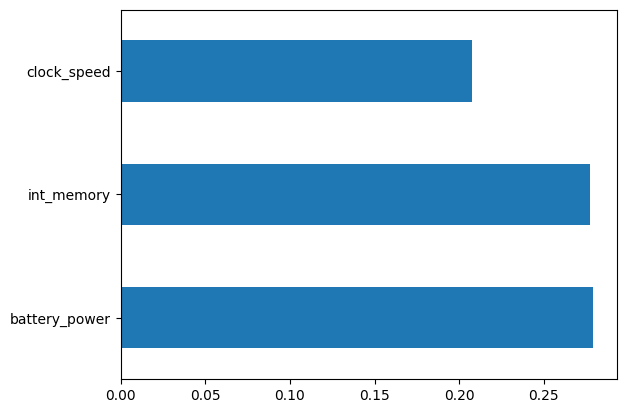

In [10]:
from sklearn.tree import ExtraTreeClassifier
X = data.drop(columns=['dual_sim'])
y = data['dual_sim']
model = ExtraTreeClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeature =  SelectKBest(score_func=chi2, k=3)  # 상위3개

fit = bestfeature.fit(X,y)
dfscores =  pd.DataFrame(fit.scores_)

In [15]:
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']
#상위 3개의 특성을 출력
scores.nlargest(3,'score')

,specs,score
0,battery_power,545.747721
3,fc,7.415152
5,int_memory,5.049112


상관관계(-1과 1사이의 연속적인 값) 히트맵

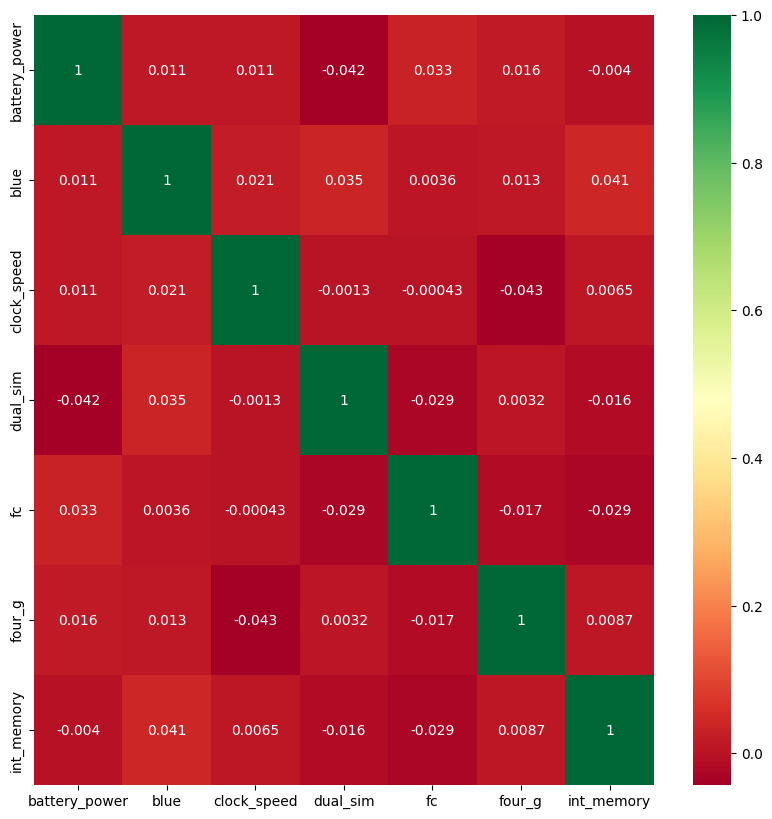

In [21]:
import seaborn as sns

correlation_matrix =  data.corr()
plt.figure(figsize=(10,10))
# 히트맵을 출력
sns.heatmap(correlation_matrix,annot=True,cmap='RdYlGn')
plt.show()


특성을 자동선택하는 방법
  - 래퍼기반 방법
    - 1. 특성의 하위 집합을 사용해 모델을 훈련
    - 2. 각 반복의 결과에 따라 특성이 하위 집합에 추가되거나 제거된다
  - 필터 기반 방법
    - 지표를 설정하고 해당 지표를 기반으로 특성을 필터링
      - 피어슨 상관관계 - heatmap
      - 선형판별 분석 - 범주형 변수에서 두 개 이상의 레벨에서 특성을 뽑거나 분리하는 선형 조합
      - 분산분석(ANOVA) - 여러그룹의 평균이 같은지 여부를 알려주는 통계테스트      
      - 카이제곱 - 범주형 변수그룹에 적용되는 통계 테스트
  - 임베디드 방법
    - 머시러닝을 이용한 방법 : 랏소회귀, 릿지회귀,등등

도메인지식없이 일반적인 방법으로 특성공학
  - 대치(결측치 처리)
  - 이상치 관리
  - 원-핫인코딩
  - 로그 변환
  - 스케일링
  - 날자처리

In [32]:
# 결측치가 있는 행을제거
# 임계값 기준으로 삭제
threshold = 0.6
# 임계값보다 높은 비율의 결측치를 갖는 열을 삭제

# data = data[data.columns[data.isnull().mean() < threshold]]
data = data.loc[data.isnull().mean(axis=1) < threshold]

In [33]:
# 결측치를 모두 0으로 대처
data = data.fillna(0)

# 결측치를 열의 중앙값으로 대처
data = data.fillna(data.mean())

범주형 데이터의 결측치 대치

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/dataset.csv')
data['color'].fillna( data['color'].value_counts().idxmax(), inplace=True)

이상치 관리
  - 주택가격 예로 생각
    - 가격결정요소
      - 침실의개수
      - 주방
      - 평수
      - 화장실개수

In [39]:
# 이상치를제거하는 방법
# 표준편차를구하고 구한 표준편차의 특정 배수에 해당하는 이상치를 제거 (2~4) 값으로 제거

In [40]:
# 수치형 데이터
data = pd.read_csv(filepath)
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000


<Axes: >

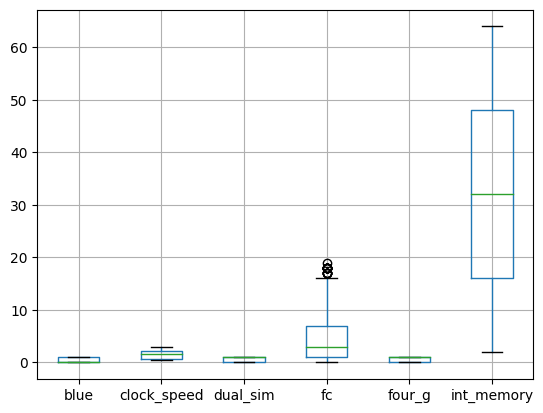

In [42]:
data.iloc[:,1:].boxplot()

<Axes: >

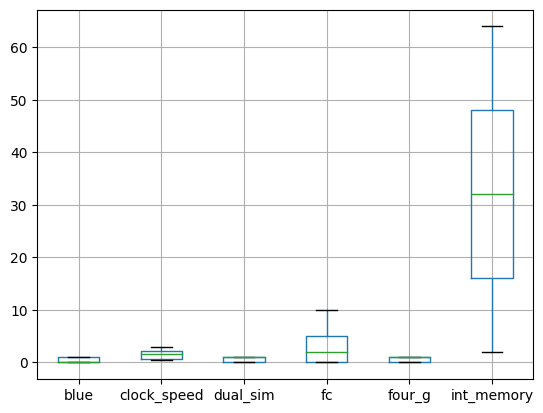

In [47]:
#표준편차를 이용한 이상치 제거
factor = 2
upper_limit = data['fc'].mean() +  data['fc'].std()*factor
lower_limit = data['fc'].mean() -  data['fc'].std()*factor
data = data[(lower_limit < data['fc']) & (data['fc'] < upper_limit)]
data.iloc[:,1:].boxplot()

<Axes: >

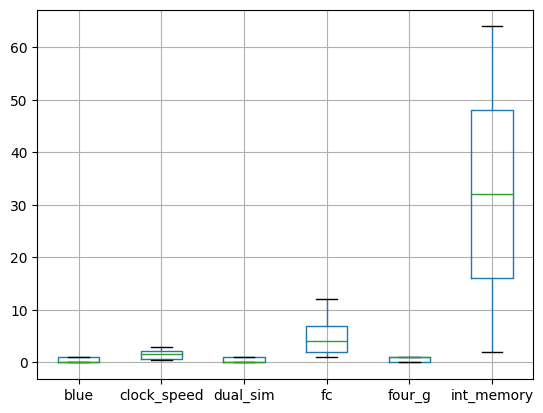

In [53]:
# 백분위수( 상위 99 ~ 하위 1)
data = pd.read_csv(filepath)
upper_limit = data['fc'].quantile(0.95)
lower_limit = data['fc'].quantile(0.05)
data = data[(lower_limit < data['fc']) & (data['fc'] < upper_limit)]
data.iloc[:,1:].boxplot()

<Axes: >

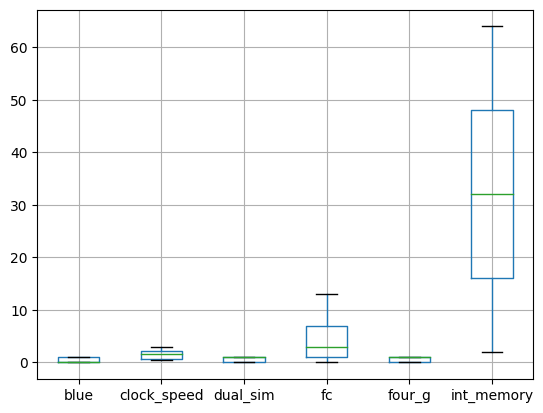

In [56]:
# 삭제 대신에 제한하는 방법
# 백분위 수로 이상치 행 제한
data = pd.read_csv(filepath)
upper_limit = data['fc'].quantile(0.95)
lower_limit = data['fc'].quantile(0.05)

data.loc[data['fc'] < lower_limit,'fc'] = lower_limit
data.loc[data['fc'] > upper_limit,'fc'] = upper_limit

data.iloc[:,1:].boxplot()


In [71]:
data = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/dataset.csv')
data['color'].fillna( data['color'].value_counts().idxmax(),inplace=True)
# pd.concat([data, pd.get_dummies(data['color'])],axis=1).drop(columns =  'color')
data.join(pd.get_dummies(data['color'])).drop(columns =  'color')

,index,black,green,purple,red,white,yellow
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1
2,2,0,0,0,1,0,0
3,3,0,0,0,1,0,0
4,4,0,0,1,0,0,0
5,5,0,0,0,1,0,0
6,6,0,0,0,1,0,0
7,7,0,0,1,0,0,0
8,8,0,0,0,1,0,0
9,9,0,0,0,1,0,0


로그변환
  - 지나치게 한쪽으로 치우쳐진 데이터에 적용
  - 데이터 분포가 정규화 된다
  - 모든데이터가 양수일때만 로그변환, 적용하기전에 데이터에 1을 더해 출력이 양수가 되도록 한다 log(x+1)
  - 15,10의 차이와 55와 50의 차이는

In [78]:
# 로그변환
data = pd.DataFrame({'value':[3,67,-17,44,37,3,31,-38]})
data['log+1']  = (data['value']+1).transform(np.log)

# 음수처리
# 값이 다른 것을 출력
data['log'] = (data['value']-data['value'].min()+1).transform(np.log)
data

,value,log+1,log
0,3,1.386294,3.737670
1,67,4.219508,4.663439
2,-17,NaN,3.091042
3,44,3.806662,4.418841
4,37,3.637586,4.330733
5,3,1.386294,3.737670
6,31,3.465736,4.248495
7,-38,NaN,0.000000


스케일링
  - 정규화(최대 최소)
  - 표준화 : 평균과 표준편차